## S LOARKS matrix 
###### Author: Zimu Huo
###### Date: 07.2022

It seems like it is working. The artefact in the final image looks very similar to that of the image used in the article. 
The phase constraints will introduce noticeable artefacts in the reconstructed image and diverge quickly after 20 iters. 

Notes: 
I don't understand why the formulation is so complicated. The pseudo-inverse matrix is unnecessary to me as you can easily compensate it in the adjoint operator. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Justin P. Haldar 
    Title: Low-Rank Modeling of Local -Space Neighborhoods (LORAKS) for Constrained MRI
    Link: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6678771

In [1]:
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
from util.phantom import * 
from rank import *
import util.io as io
import random
import util.mask as undersample
from numpy import linalg as linalg

In [2]:
filepath = '../lib/resource/data/multicoil_1slice/meas_MID308_low_res_2dflash_FID17297.dat'
data = io.getCoilData(filepath) 
data = data[:,:,::8]
[ny, nx, nc] = data.shape
print(data.shape)

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

read data:   0%|          | 0/256 [00:00<?, ?it/s]

(256, 256, 4)


0.05877685546875


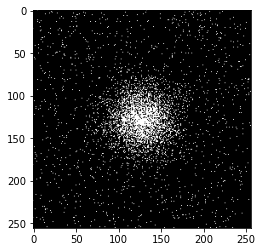

In [3]:
mask = var_dens_mask([ny, nx], 0.001)
print(undersampling_rate(mask))
show(mask)

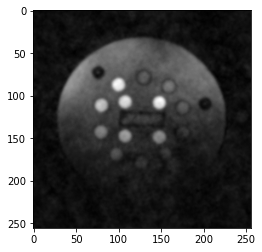

In [4]:
mask = np.tile(mask.reshape(ny,nx,1), (1,1,nc))
dataR = data * mask
showrsos(ifft2c(dataR))

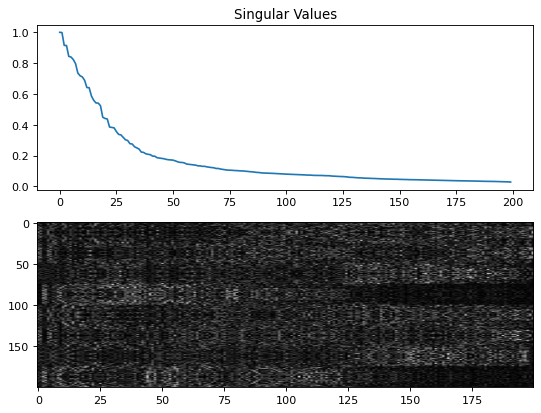

In [5]:
inspect_rank(PLOARKS_S(dataR, 5))

In [6]:
import numpy.matlib
from scipy.linalg import block_diag
res = np.copy(dataR)
[ny, nx, nc] = dataR.shape
rank = 75
k = 5

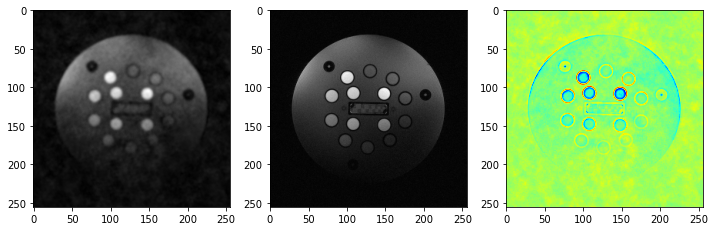

1.361581170294279


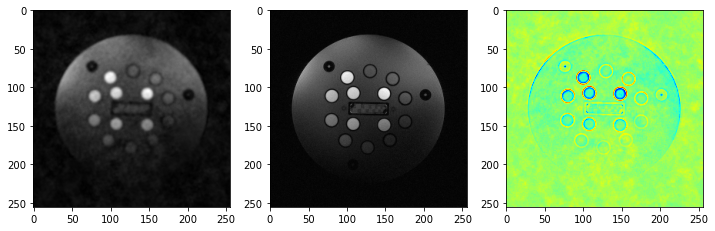

1.1956866906082706


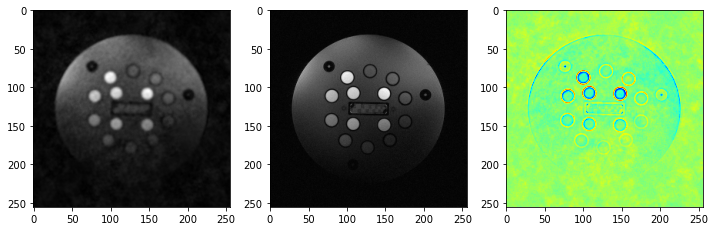

1.0817170183737093


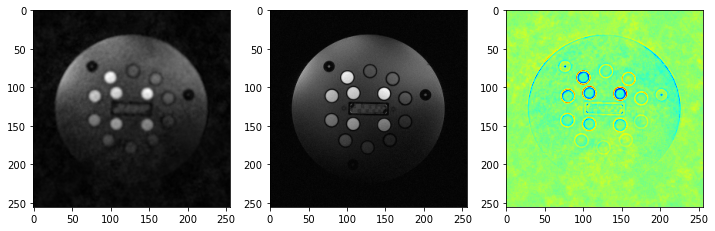

0.9993794136969354


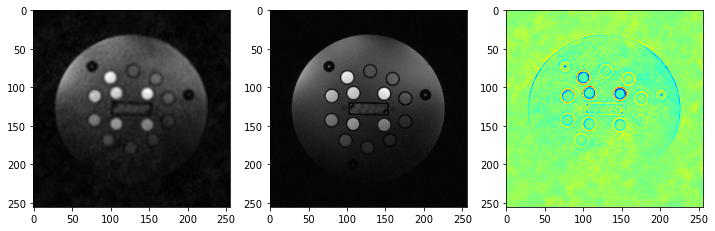

0.9383226176656487


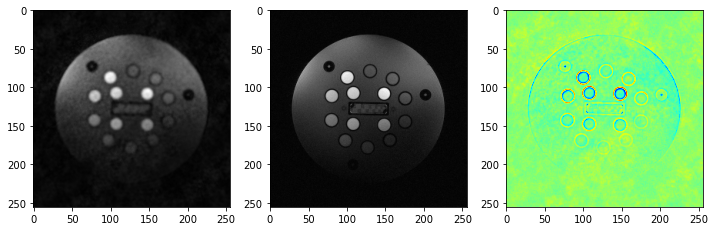

0.8924780343313475


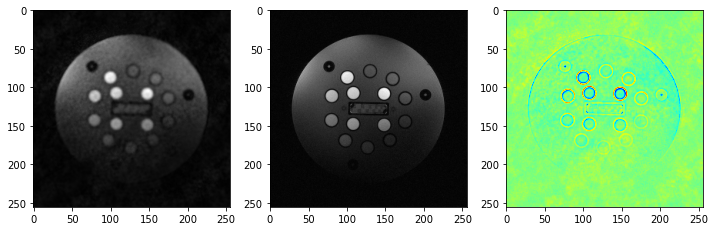

0.8579832205149063


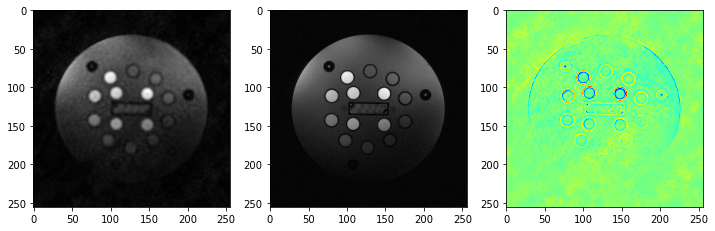

0.8324480119612384


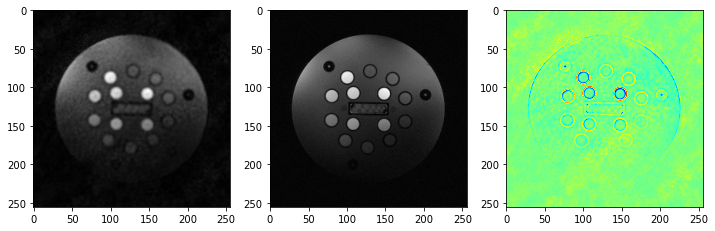

0.8145972176578495


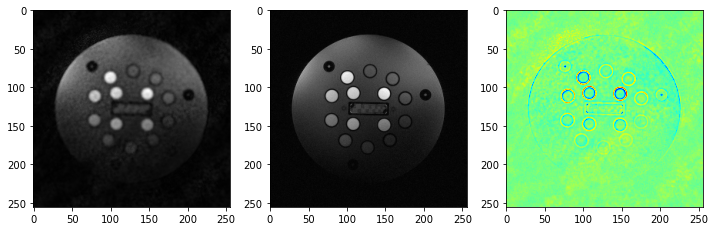

0.804085188143877


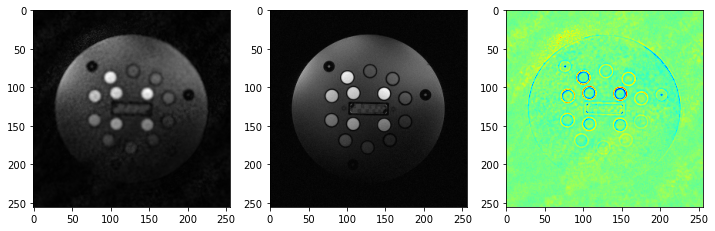

0.8014006149420014


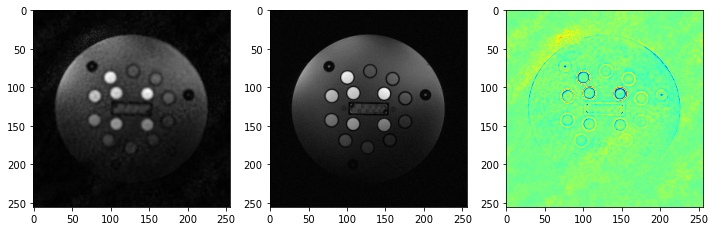

0.807701988779653


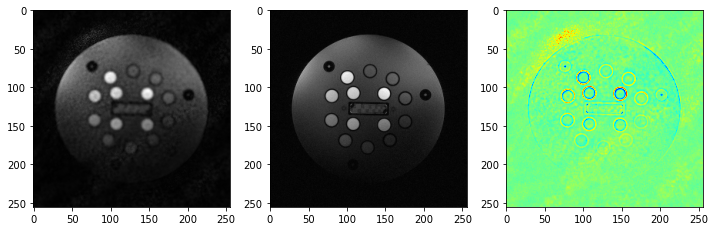

0.8240705880449386


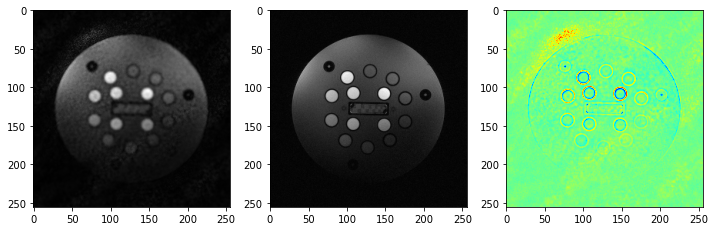

0.8497232290257345


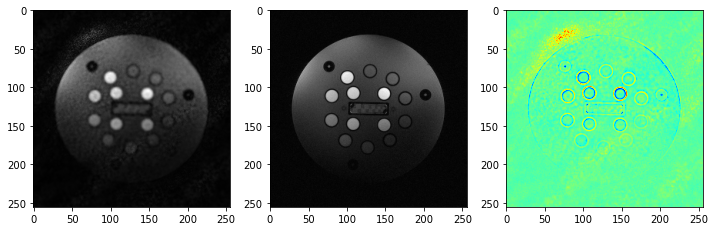

0.8815387821988192


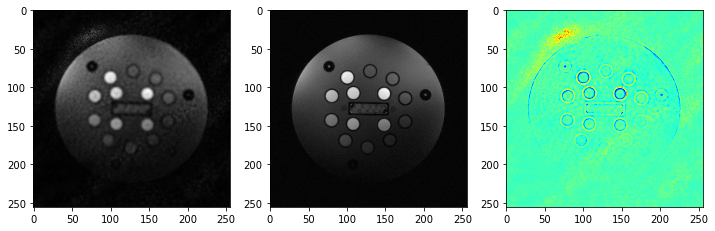

0.916667258013827


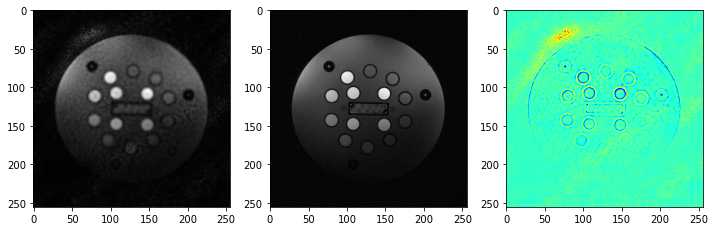

0.9538234723879796


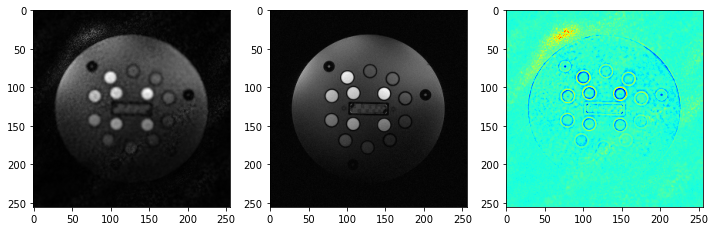

0.993913006901703


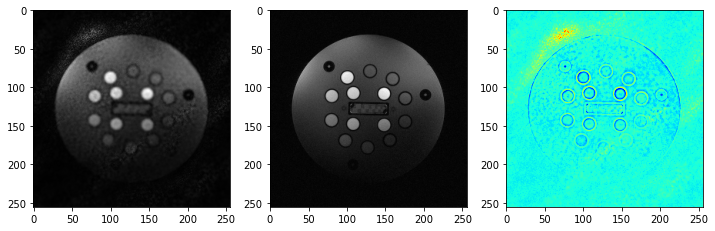

1.0361512059356892


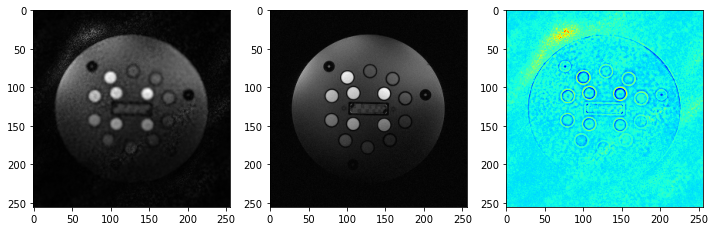

1.0759118954991431


In [7]:
log = []
for i in range(20):
    S = PLOARKS_S(res, k)
    Sr = rank_approx(S, rank)
    Ks = PLOARKS_Sinv(Sr, k, data.shape)
    res = dataR + np.abs(1-mask) * Ks
    if i > 0:
        log.append(linalg.norm(res)-linalg.norm(prev))
    prev = res
    plt.figure(figsize = (12, 8))
    plt.subplot(131)
    plt.imshow(np.abs(rsos(ifft2c(res))), cmap ="gray")
    plt.subplot(132)
    plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")
    plt.subplot(133)
    plt.imshow(np.abs(rsos(ifft2c(res)))-np.abs(rsos(ifft2c(data))), cmap ="jet")
    plt.show()
    print(np.sum((np.abs(rsos(ifft2c(res)))-np.abs(rsos(ifft2c(data))))**2))

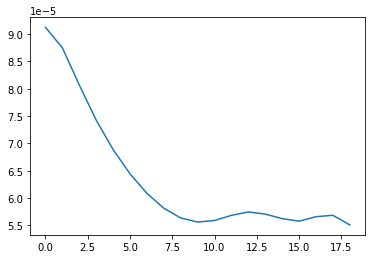

In [8]:
plt.plot(log)